### Mini Project
# Regression :- Prediction Of Store Sales 

### Store Sales Prediction Overview
- The success of any retail store depends upon its sales. More the sales made, more is the revenue. With a good customer service and care, the customer too enjoys a good shopping experience. This will lead to more in-flow of customers, opening more store branches across a city / country.
- To enable this, store owners rely heavily on past data to predict future sales. This will help them in strategizing their business models and come up with innovative techniques and ideas to attract customers and set realistic goals.
- Many medium to large stores implement this kind of analytics to understand trends like which products are getting sold faster, what are the slow moving products, impact of store types, etc. With new branches of the store, the analysis can get more complex and may also involve stiff competition from other competitors.

### Business Objective
- Build a model to predict the Sales of a store

### Technical Goals
- Understand the data very well. Do all transformations / data engineering / etc. wherever applicable
- Perform Exploratory Data Analysis (EDA)
- Carry out all the Data mining tasks
- Identify the salient features that will determine the best results
- Perform the model evaluation to select the best algorithms

#### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Loading the data

In [2]:
df=pd.read_csv("DS3_C6_S1_Regression_StoreSales_Data_Project.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Insights from data

In [3]:
df.shape

(14204, 12)

In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
df.dropna(axis=0,inplace=True)

In [7]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [8]:
store = df

####  EDA

In [9]:
store.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


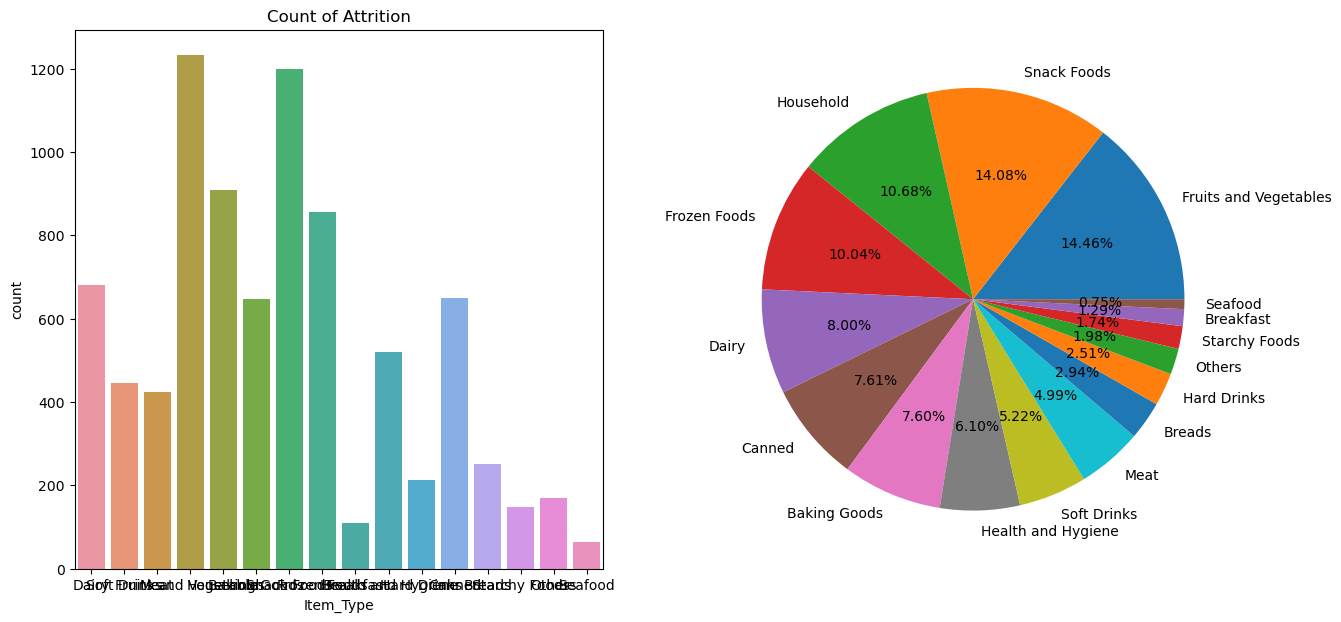

In [10]:
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Attrition")                  # Set the title of the graph
percentage = df["Item_Type"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Item_Type"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["Item_Type"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie
plt.show()

['Low Fat' 'Regular']


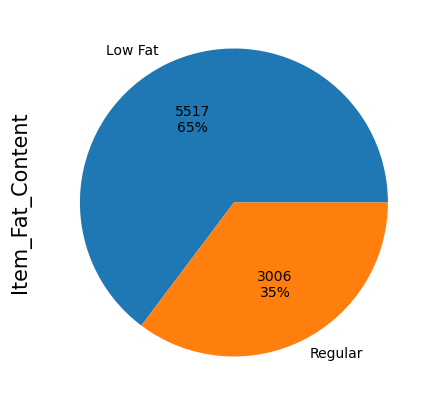

In [11]:
# Pie charts of categorical features
labels=df['Item_Fat_Content'].unique()
print(labels)
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))

#plt.pie(income_df_c['purpose_encode'])
df.groupby(df['Item_Fat_Content']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('Item_Fat_Content', size=15)
# show plot
plt.show()

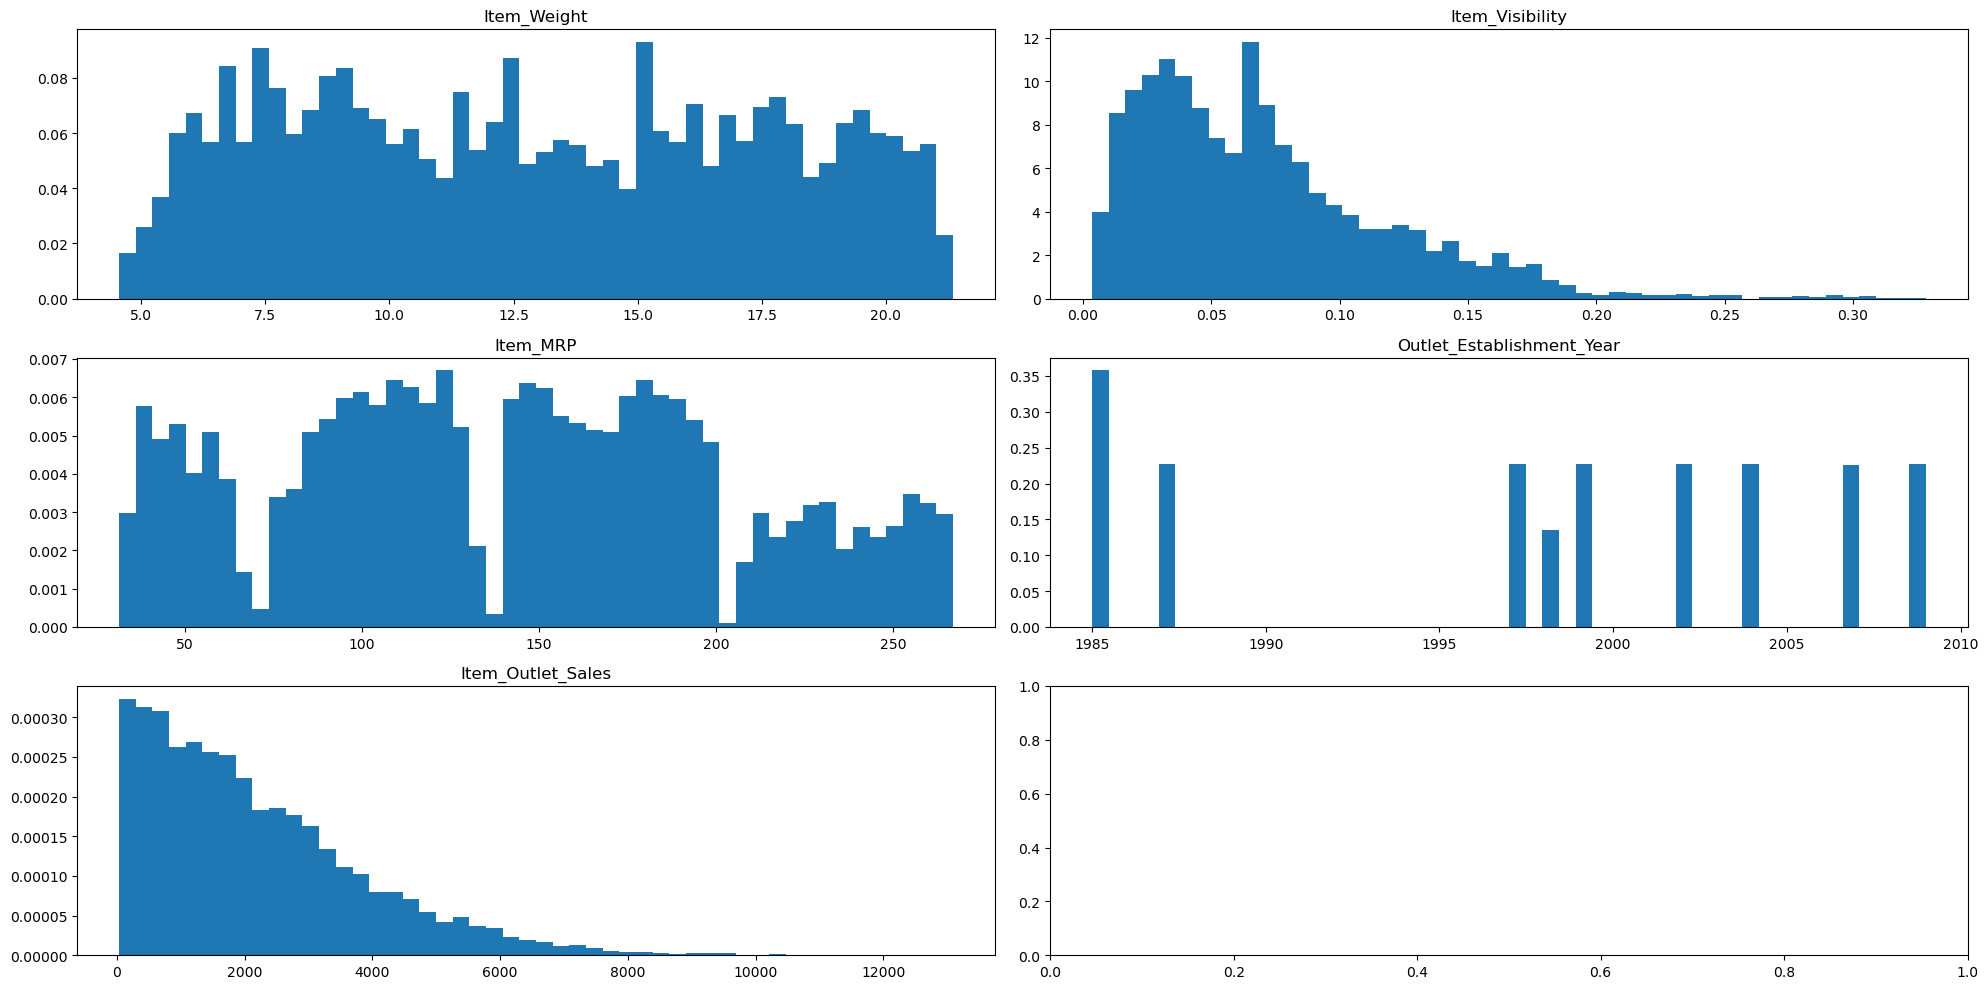

In [12]:
# Histograms of Numerical Columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

new_df = df.select_dtypes(include=numerics)
numeric_cols=new_df.columns
num_cols=2
n_bins = 50

# compute number of rows for plot 
num_rows= int(len(numeric_cols)/num_cols)+1

# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,10))

# plotting the numerical columns
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
    ax.hist(new_df[col],bins=n_bins,density=True)
    ax.set_title(col)

plt.show()

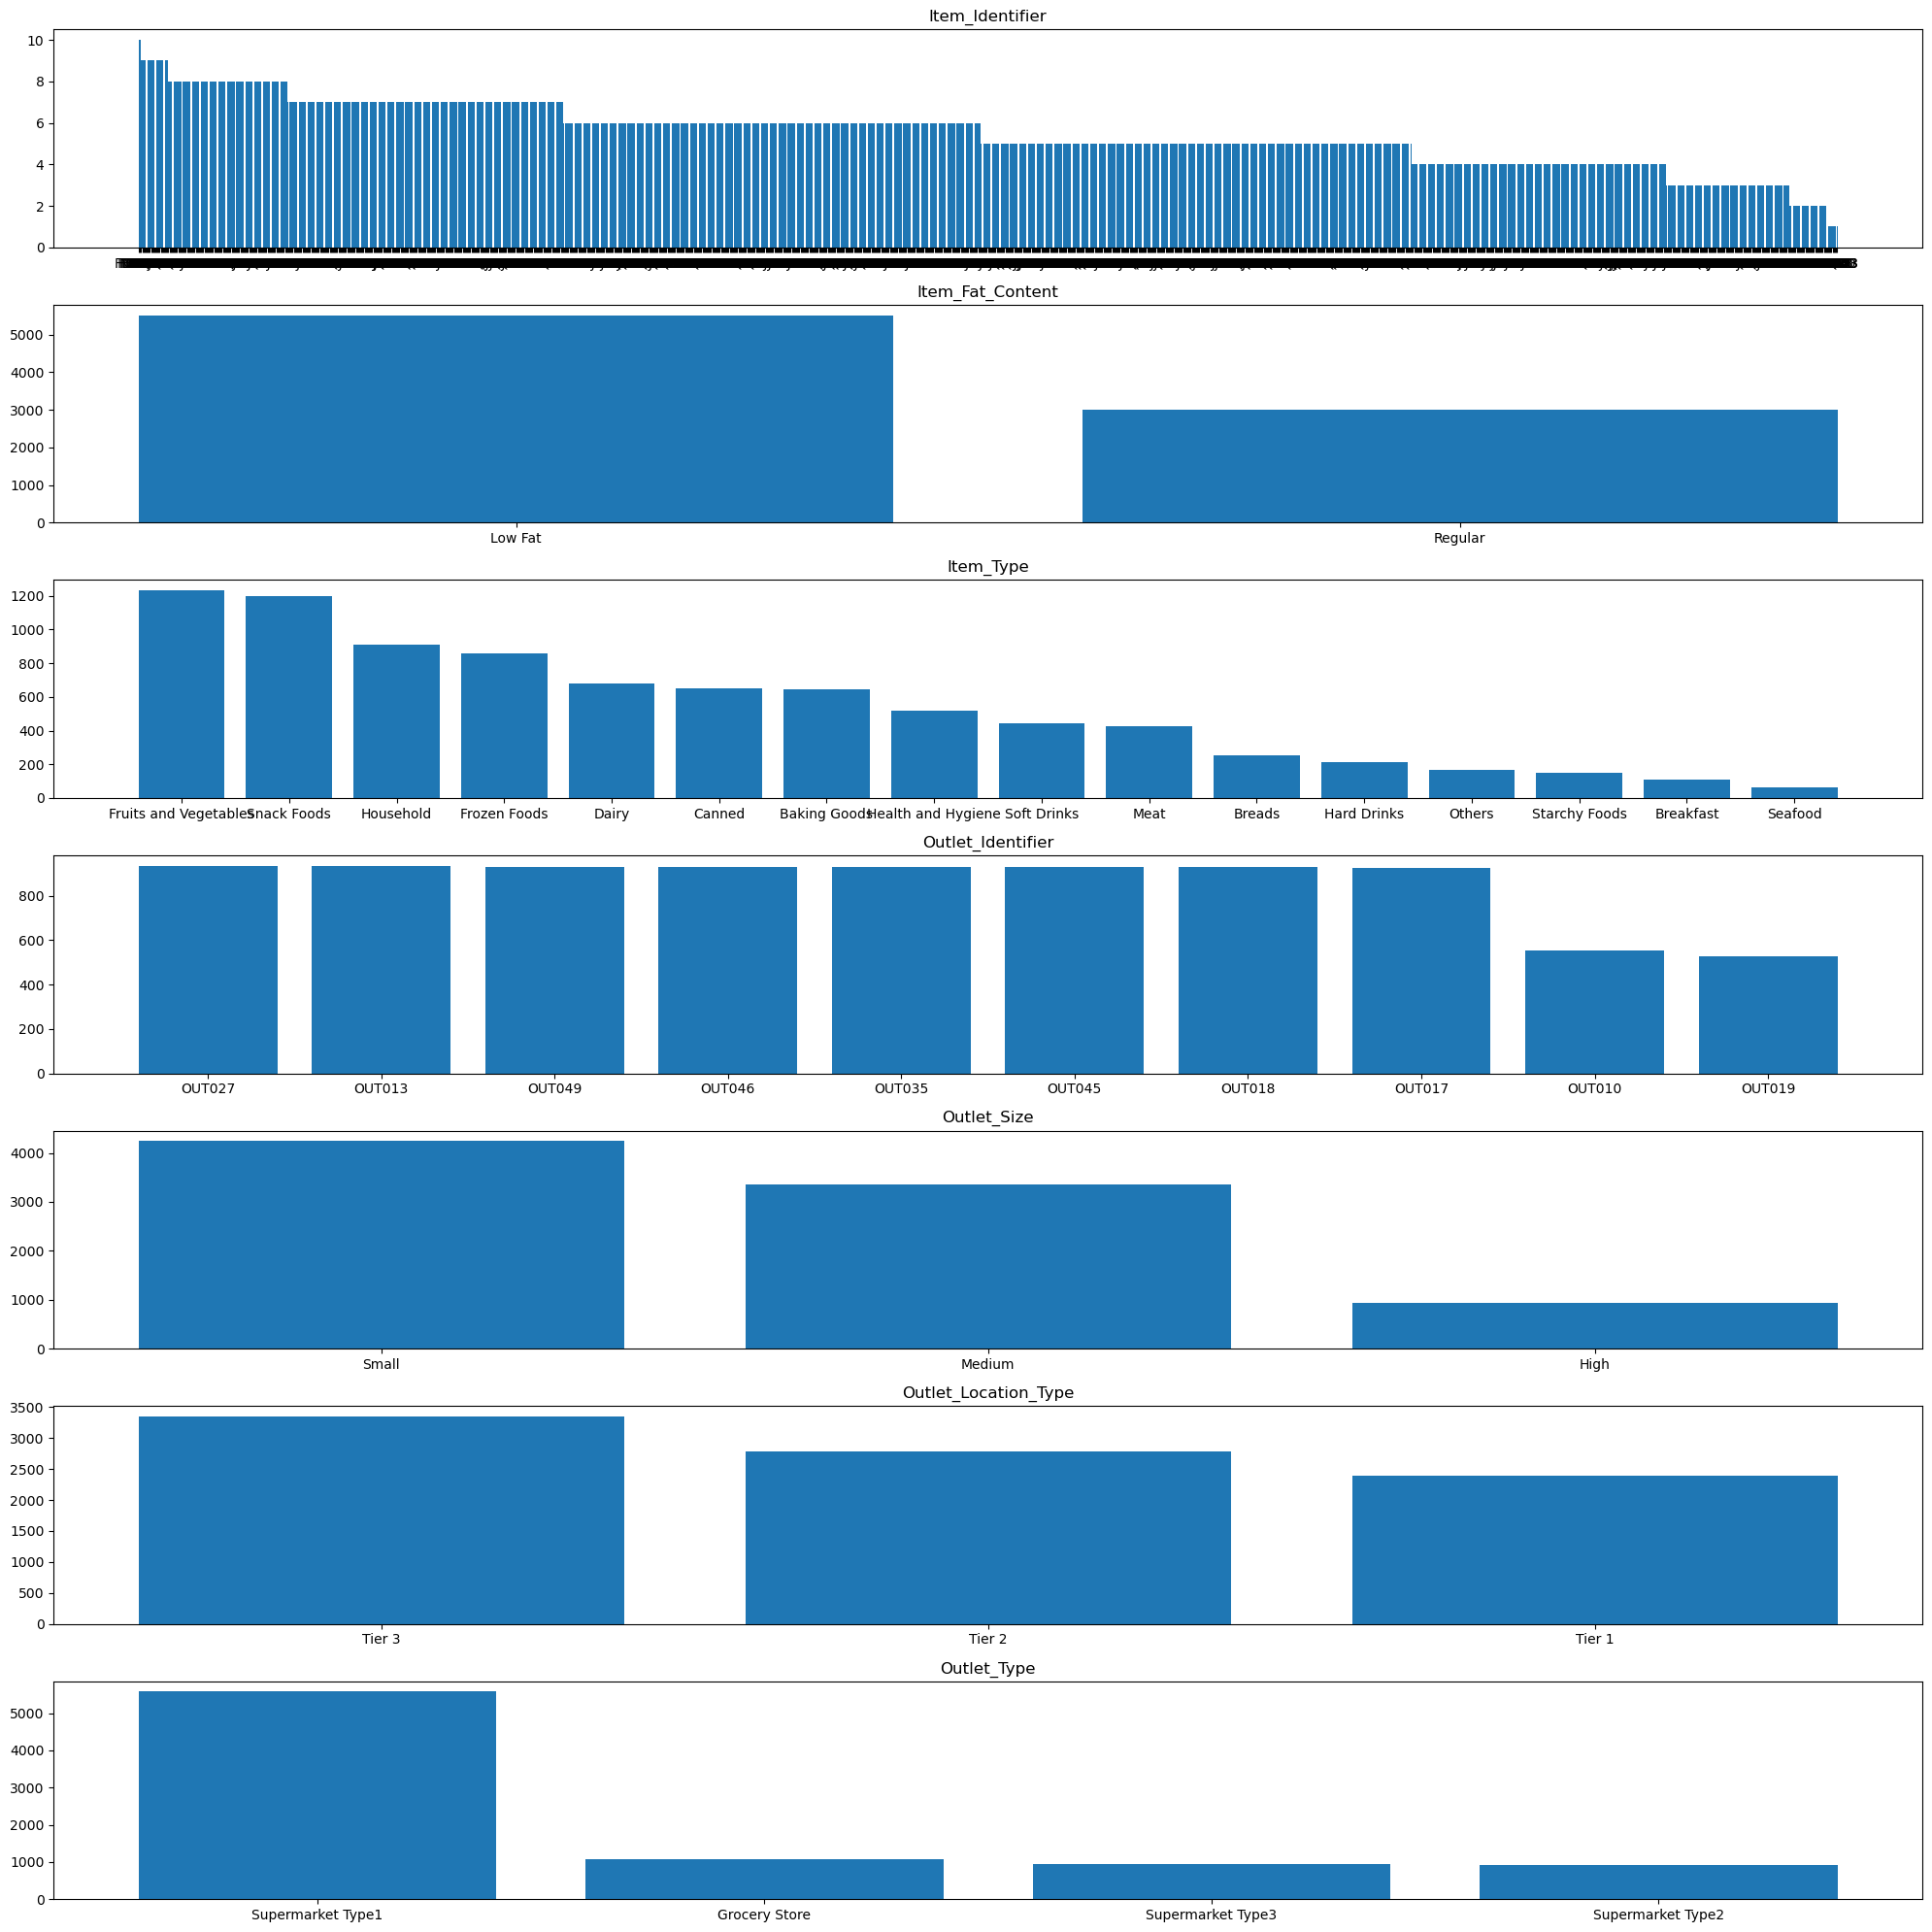

In [13]:
# Histogram of all categorical features
num_cols = 1
cat_df = df.select_dtypes('object')
categorical_cols=cat_df.columns

# compute number of rows for plot 
num_rows= int(len(categorical_cols)/num_cols)

# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True, figsize=(20,20))

# plotting the numerical columns
for col, ax in zip(categorical_cols,axs.flatten()[:len(categorical_cols)]):
    stats = cat_df[col].value_counts()
    values = list(stats)
    names = list(map(lambda x : ''.join((str(x))),list(stats.index)))
    ax.bar(names,values)
    ax.set_title(col)
    
plt.show()

#### Label Encoding
- To convert categorical data into numerical/continuous data for model preparation

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [17]:
df.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

In [18]:
z_scores = np.abs((df -  df.mean()) / df.std())

# Identify outliers using a threshold
threshold = 3
outliers = df[z_scores > threshold]

In [19]:
outliers.sum()

Item_Identifier                   0.000000
Item_Weight                       0.000000
Item_Fat_Content                  0.000000
Item_Visibility                  25.712405
Item_Type                         0.000000
Item_MRP                          0.000000
Outlet_Identifier                 0.000000
Outlet_Establishment_Year         0.000000
Outlet_Size                       0.000000
Outlet_Location_Type              0.000000
Outlet_Type                       0.000000
Item_Outlet_Sales            761257.743400
dtype: float64

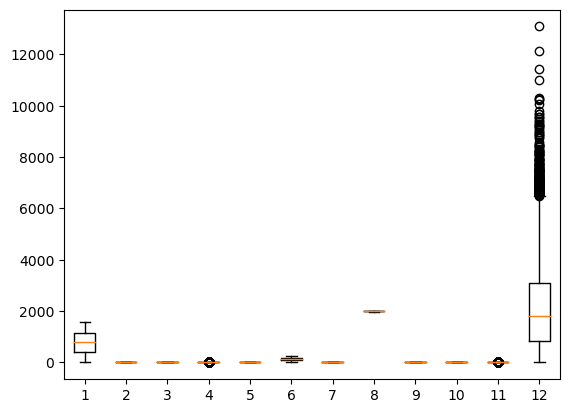

In [20]:
import matplotlib.pyplot as plt
plt.boxplot(df.values)
plt.show()

In [21]:
column_correlation = df.corr()
column_correlation.style.background_gradient(cmap='coolwarm')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.048366,-0.114660,-0.029442,-0.017973,0.012853,-0.008602,-0.012772,-0.002556,0.003656,-0.001178,0.002869
Item_Weight,0.048366,1.000000,-0.027166,-0.018409,0.035973,0.026172,-0.007568,-0.012823,-0.013371,0.002929,0.000298,0.013261
Item_Fat_Content,-0.114660,-0.027166,1.000000,0.049815,-0.139434,0.006063,0.000764,0.003151,-0.001369,-0.001598,0.002199,0.018719
Item_Visibility,-0.029442,-0.018409,0.049815,1.000000,-0.036094,-0.005861,-0.105722,-0.080598,0.031617,-0.029109,-0.178473,-0.135247
Item_Type,-0.017973,0.035973,-0.139434,-0.036094,1.000000,0.032651,0.001656,0.004970,-0.000394,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.026172,0.006063,-0.005861,0.032651,1.000000,0.003319,0.005020,0.001215,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007568,0.000764,-0.105722,0.001656,0.003319,1.000000,0.079035,0.423653,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.012823,0.003151,-0.080598,0.004970,0.005020,0.079035,1.000000,0.428367,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.002556,-0.013371,-0.001369,0.031617,-0.000394,0.001215,0.423653,0.428367,1.000000,-0.590686,-0.260467,-0.060517
Outlet_Location_Type,0.003656,0.002929,-0.001598,-0.029109,0.003084,0.000232,-0.716176,-0.089216,-0.590686,1.000000,0.467219,0.089367


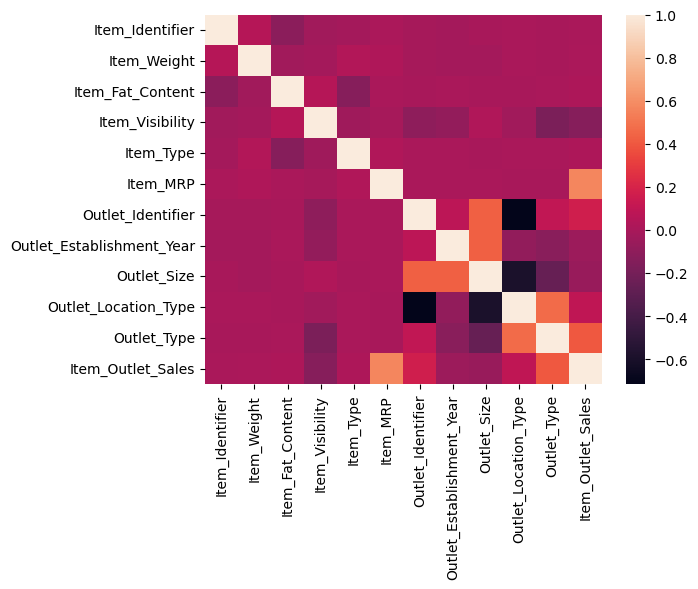

In [42]:
import seaborn as sns
sns.heatmap(column_correlation,annot=False)
plt.show()

In [23]:
store.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.074402,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.064299,9,53.8614,1,1987,0,2,1,994.7052


#### Splitting and Scaling the Data
- We split and scale the data before fitting it into the model

In [24]:
X = df.loc[:,['Item_Identifier', 'Item_Weight', 'Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]            # storing into x and y
y = df.loc[:,['Item_Outlet_Sales']]

In [25]:
from sklearn.model_selection import train_test_split   # for splitting the data into train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)   

In [26]:
# scaling the data using MinMax Scaling process
from sklearn.preprocessing import StandardScaler,MinMaxScaler  
scaler = MinMaxScaler() #standard
X_train = scaler.fit_transform(X_train)
#X_train=X_train(scale)
X_train

X_test = scaler.fit_transform(X_test)
X_test

array([[0.31258023, 0.57935561, 0.        , ..., 0.        , 1.        ,
        0.33333333],
       [0.89345315, 0.19928401, 0.        , ..., 1.        , 0.        ,
        0.33333333],
       [0.15661104, 0.59128878, 1.        , ..., 0.5       , 0.        ,
        0.33333333],
       ...,
       [0.15661104, 0.59128878, 1.        , ..., 0.        , 1.        ,
        0.33333333],
       [0.75481386, 0.31085919, 1.        , ..., 0.5       , 1.        ,
        0.66666667],
       [0.16238768, 0.19779236, 0.        , ..., 1.        , 0.5       ,
        0.33333333]])

- Since this is a regression type problem, we will be performing all possible regression models and find out the best possible Machine Learning algorithm for the given data

#### 1. Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [28]:
model = LinearRegression()

In [29]:
s1=model.fit(X_train,y_train)

In [30]:
s = s1.score(X_train,y_train)
print("Coeffiecient of determination",s)

Coeffiecient of determination 0.4976654650462309


In [31]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred=s1.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(r2)
print(mse)

0.5204628034878942
1303367.7459492043


#### 2. Kfold

In [32]:
from sklearn.model_selection import KFold, cross_val_score

In [33]:
kf = KFold(n_splits=5, shuffle = True, random_state=42)

In [34]:
# Evaluate the model using cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

rmse = np.sqrt(-scores.mean())

# Print the RMSE
print("RMSE: %.3f" % rmse)


RMSE: 1205.888


#### Hyperparameter tuning

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid = {'fit_intercept': [True, False], 'normalize': [True, False]}
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid.best_params_
print("Best hyperparameters:", best_params)

best_model = LinearRegression(**best_params)
best_model.fit(X_train, y_train)
y_pred1= best_model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred1)
print("Mean Squared Error:", mse)
r2=r2_score(y_test,y_pred1)
print(r2)

Best hyperparameters: {'fit_intercept': True, 'normalize': True}
Mean Squared Error: 1303367.7459492043
0.5204628034878942


#### Decision Tree Regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
m = DecisionTreeRegressor()

In [38]:
s = m.fit(X_train, y_train)
Y_pred3 = s.predict(X_test) 

In [39]:
Y_pred3

array([ 554.6114, 1249.0408, 1216.4166, ..., 1216.4166,  958.752 ,
       1672.4896])

In [40]:
mse = mean_squared_error(y_test, Y_pred3)
r2 = r2_score(y_test, Y_pred3)
print(mse)
print(r2*100)

2292500.136711148
15.653959369581694


#### Stacking using Random Forest Regressor

In [41]:
from sklearn.ensemble import RandomForestRegressor
lr = LinearRegression()
dt = DecisionTreeRegressor(max_depth=6)
rf = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)


# Train the base models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)


# Generate predictions for the training data
lr_train_pred = lr.predict(X_train)
dt_train_pred = dt.predict(X_train)
rf_train_pred = rf.predict(X_train)


# Generate predictions for the testing data
lr_test_pred = lr.predict(X_test)
dt_test_pred = dt.predict(X_test)
rf_test_pred = rf.predict(X_test)


# Create the stacked dataset
stacked_train = np.column_stack((lr_train_pred, dt_train_pred, rf_train_pred))
stacked_test = np.column_stack((lr_test_pred, dt_test_pred, rf_test_pred))

# Train the meta-regressor
meta_regressor = LinearRegression()
meta_regressor.fit(stacked_train, y_train)

# Generate predictions for the testing data using the stacked model
stacked_pred = meta_regressor.predict(stacked_test)


r2=r2_score(y_test,stacked_pred)
print(r2)

0.6182945990643725


##### Interpretation:
- It can be observed that for the above data, Stacking appears to be the best possible model with an R^2 score of 61%